In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [6]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])

In [7]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [8]:
df['Family'] = df['SibSp'] + df['Parch']

In [17]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Family    891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [19]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
Family      0.000000
dtype: float64

In [21]:
X = df.drop(columns='Survived')
y = df['Survived']

In [22]:
X_train,X_test,y_tran,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
X_train.shape

(712, 3)

In [24]:
X_test.shape

(179, 3)

In [25]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

In [26]:
X_train['Age Median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

In [29]:
X_train.sample(5)

,Age,Fare,Family,Age Median,Age_mean
243,22.0,7.1250,0,22.00,22.000000
36,NaN,7.2292,0,28.75,29.785904
746,16.0,20.2500,2,16.00,16.000000
318,31.0,164.8667,2,31.00,31.000000
130,33.0,7.8958,0,33.00,33.000000


In [32]:
print("Origianl variance age",X_train['Age'].var())
print("mean variance age",X_train['Age_mean'].var())
print("median variance age",X_train['Age Median'].var())

Origianl variance age 204.3495133904614
mean variance age 161.81262452718673
median variance age 161.9895663346054


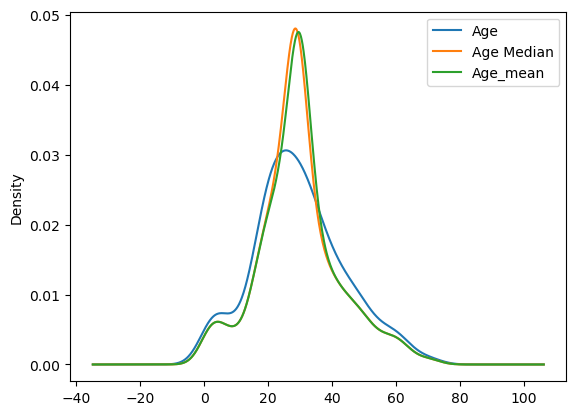

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Orginal
X_train['Age'].plot(kind='kde',ax=ax)

#Update
X_train['Age Median'].plot(kind='kde',ax=ax)

#Update
X_train['Age_mean'].plot(kind='kde',ax=ax)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels ,loc='best')

In [35]:
X_train.cov()

,Age,Fare,Family,Age Median,Age_mean
Age,204.349513,71.512440,-6.498901,204.349513,204.349513
Fare,71.512440,2368.246832,16.847264,58.986531,56.626587
Family,-6.498901,16.847264,2.735252,-5.112563,-5.146106
Age Median,204.349513,58.986531,-5.112563,161.989566,161.812625
Age_mean,204.349513,56.626587,-5.146106,161.812625,161.812625


In [36]:
X_train.corr()

,Age,Fare,Family,Age Median,Age_mean
Age,1.000000,0.095814,-0.299113,1.000000,1.000000
Fare,0.095814,1.000000,0.209323,0.095235,0.091475
Family,-0.299113,0.209323,1.000000,-0.242883,-0.244610
Age Median,1.000000,0.095235,-0.242883,1.000000,0.999454
Age_mean,1.000000,0.091475,-0.244610,0.999454,1.000000


<Axes: >

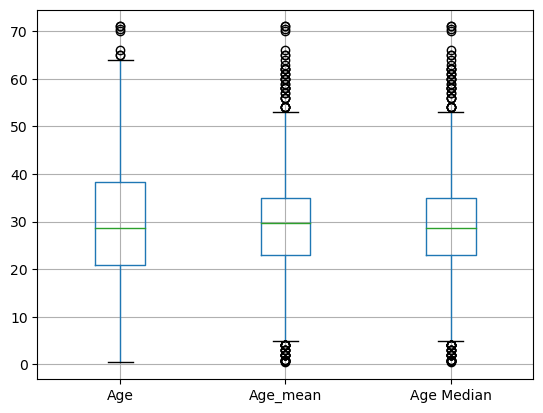

In [37]:
X_train[['Age','Age_mean','Age Median']].boxplot()

In [39]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [40]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Age'])
],remainder='passthrough')

In [41]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [43]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [44]:
trf.named_transformers_['imputer2'].statistics_

array([28.75])

In [45]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

ValueError: columns are missing: {'Age Median', 'Age_mean'}